# Lecture 16 K nearest neighbors (KNN)

#### Problem:
The test sample (green dot) should be classified either to blue squares or to red triangles. How do you decide which cluster it belongs to?
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/440px-KnnClassification.svg.png)

Source: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

#### The philosophy of KNN: think of your neighbors:
- Your neighbors are often similar to you (go to the same school; similar socioeconomic class; similar jobs)
- It is reasonable to use some of your neighbors' feature to predict/estimate the features of you
- k is numbers of the neighbors to be used for prediction

If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

![](https://drive.google.com/file/d/18vtsbiOihV37gljaJxujrAJb4GsrZmAA/view?usp=drive_link)


##**Key Steps of KNN**
### 1. Choose the Number of Neighbors, \(k\)
- The first step is to select the number of \(k\) nearest neighbors to consider. The choice of \(k\) significantly impacts the performance of the algorithm. A small \(k\) makes the model sensitive to noise, while a large \(k\) makes it computationally expensive and potentially less accurate as it may include points from other classes.

### 2. Calculate Distance
- For each instance in the dataset that needs to be classified (or have its value predicted), calculate the distance between that instance and every other instance in the training dataset. Common distance measures include Euclidean, Manhattan, and Minkowski distances. The choice of distance measure can affect the performance of the algorithm.

### 3. Identify Nearest Neighbors
- After calculating the distances, identify the \(k\) nearest neighbors to the instance to be classified. These are the \(k\) instances in the training dataset that have the smallest distance to the instance in question.

### 4. Make Predictions
- For classification tasks: The predicted class for the instance is determined by a majority vote of its \(k\) nearest neighbors. The instance is assigned to the class most common among its \(k\) nearest neighbors.
- For regression tasks: The predicted value for the instance is usually the average of the values of its \(k\) nearest neighbors.

### 5. Handle Ties (Classification)
- In classification, if there is a tie in the vote (e.g., two classes have the same number of nearest neighbors), it can be broken in several ways, such as choosing the class of the nearest neighbor among the tied groups or by reducing \(k\) until the tie is broken.



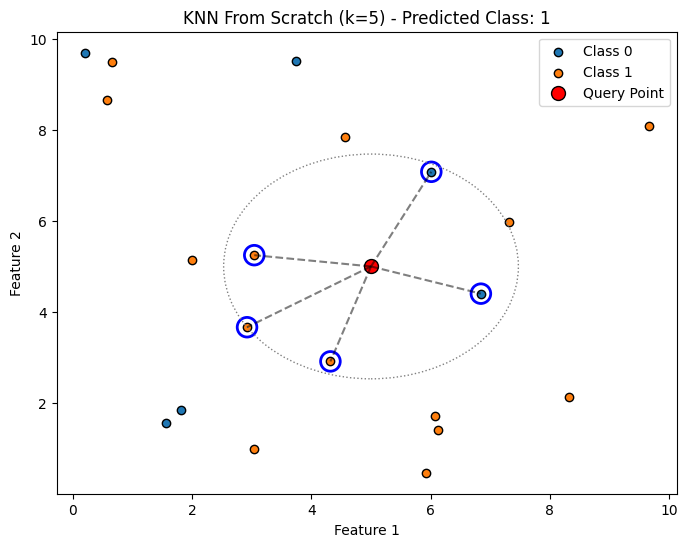

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.patches import Circle

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(20, 2) * 10  # 20 points in 2D space
y = np.random.choice([0, 1], size=20)  # Binary classification

# Query point (new data point to classify)
query_point = np.array([[5, 5]])
k = 5  # Number of neighbors

# Compute distances
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

distances = np.array([euclidean_distance(query_point[0], x) for x in X])
neighbors_idx = np.argsort(distances)[:k]

# Majority vote for classification
neighbor_labels = y[neighbors_idx]
predicted_class = Counter(neighbor_labels).most_common(1)[0][0]

# Plot training data
plt.figure(figsize=(8, 6))
for class_label in np.unique(y):
    plt.scatter(X[y == class_label, 0], X[y == class_label, 1], label=f'Class {class_label}', edgecolors='black')

# Plot query point
plt.scatter(query_point[:, 0], query_point[:, 1], color='red', label='Query Point', edgecolors='black', s=100)

# Highlight k nearest neighbors
for idx in neighbors_idx:
    plt.scatter(X[idx, 0], X[idx, 1], s=200, facecolors='none', edgecolors='blue', linewidth=2)
    plt.plot([query_point[0, 0], X[idx, 0]], [query_point[0, 1], X[idx, 1]], 'k--', alpha=0.5)

# Draw a circle around the query point indicating the radius to k-th neighbor
radius = distances[neighbors_idx[-1]]
circle = Circle(query_point[0], radius, color='gray', fill=False, linestyle='dotted')
plt.gca().add_patch(circle)

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KNN From Scratch (k={k}) - Predicted Class: {predicted_class}')
plt.legend()
plt.show()


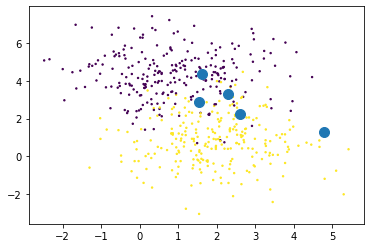

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500,
                  centers=2,
                  cluster_std=1.3,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=2);

rng = np.random.RandomState(0)
Xnew =  [-1, -1] + [6, 6] * rng.rand(5, 2)

plt.scatter(Xnew[:, 0], Xnew[:, 1], s=100);


array([1, 1, 0, 0, 1])

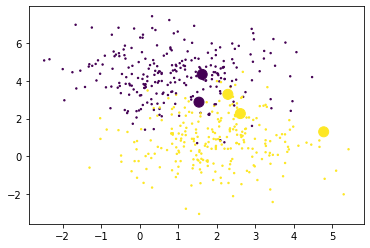

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X, y)

ypreds = knn_model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=2);
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ypreds, s=100);

ypreds

array([0.66666667, 1.        , 0.        , 0.        , 1.        ])

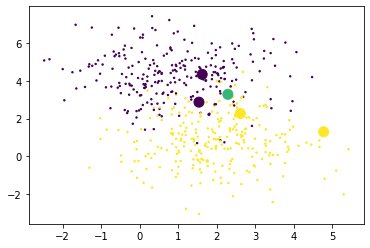

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3)

knn_model.fit(X, y)

ypreds = knn_model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=2);
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ypreds, s=100);

ypreds

In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target variable
df['species'] = iris.target

# Map target numbers to species names
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["species"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

print(ypred)
print(ytest)

print(knn.score(Xtest,ytest))

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']
73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
31         setosa
64     versicolor
141     virginica
68     versicolor
82     versicolor
110     virginica
12         setosa
36         setosa
9          setosa
19         setosa
56     versicolor
104     virginica
69     versicolor
55     versicolor
132     virginica
29         setosa
127     virginica
26         setosa
128     virginica
131     virginica
145     virginica
108     virginica
143     virginica
45         setosa
30         setosa
Name: species, dtype: object
1.0


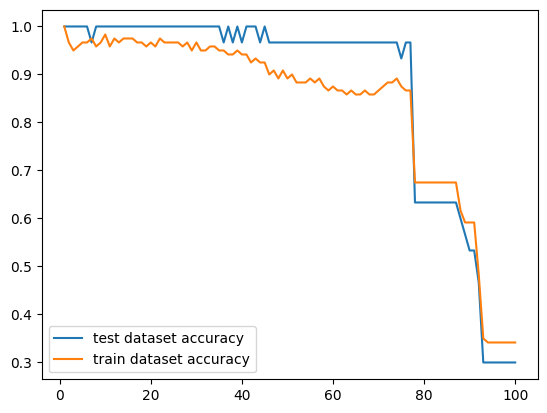

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df["species"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

nk = 100
train_accuracy = np.empty(nk)
test_accuracy = np.empty(nk)
for k in np.arange(1,nk+1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(Xtrain, ytrain)
    train_accuracy[k-1] = knn.score(Xtrain,ytrain)
    test_accuracy[k-1] = knn.score(Xtest,ytest)

plt.plot(np.arange(1,nk+1), test_accuracy, label = "test dataset accuracy")
plt.plot(np.arange(1,nk+1), train_accuracy, label = "train dataset accuracy")
plt.legend()

### Example: Predict GPP with weather data

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

filedir = '/content/drive/MyDrive/Teaching/FWE458_Spring2025/Lec16/'
fname = filedir + "FLX_US-Ho1_FLUXNET2015_SUBSET_DD_1996-2018_beta-3.csv"

Ho = pd.read_csv(fname)
Ho = Ho[["TIMESTAMP", "TA_F", "SW_IN_F", "SW_IN_POT", "LW_IN_F", "VPD_F", "P_F", "GPP_NT_VUT_REF"]]

#Ho['Date'] = pd.to_datetime(Ho['TIMESTAMP'], format='%Y%m%d')
#Ho = Ho.set_index('Date')
Ho[Ho <= -9999] = None
Ho = Ho.dropna()

Ho

,TIMESTAMP,TA_F,SW_IN_F,SW_IN_POT,LW_IN_F,VPD_F,P_F,GPP_NT_VUT_REF
5844,20120101,-1.383,35.684,123.424,276.771,0.374,0.000,3.12844
5845,20120102,2.402,41.243,124.045,285.262,0.627,5.700,3.76078
5846,20120103,-7.778,78.760,124.725,186.806,1.404,0.000,1.87902
5847,20120104,-11.513,75.426,125.464,194.283,1.228,0.000,1.35165
5848,20120105,-5.777,34.023,126.261,232.735,1.728,0.000,2.34895
...,...,...,...,...,...,...,...,...
8396,20181227,-10.092,72.194,121.207,193.980,1.218,0.000,6.31033
8397,20181228,-3.562,2.405,121.532,296.608,0.564,8.883,7.29514
8398,20181229,-0.347,24.986,121.916,282.083,0.482,0.931,7.47815
8399,20181230,-9.441,58.719,122.360,200.991,1.215,0.001,6.38425


2.1219174290938243


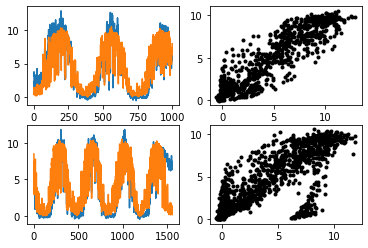

In [ ]:
X = Ho[["TA_F", "SW_IN_F", "VPD_F"]]
y = Ho["GPP_NT_VUT_REF"]

train_len = 1000
Xtrain = X[0:train_len]
Xtest = X[train_len:-1]

ytrain = y[0:train_len]
ytest = y[train_len:-1]


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(Xtrain, ytrain)
ypred_train = knn.predict(Xtrain)
ypred_test = knn.predict(Xtest)

fig,ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(0,train_len), ytrain)
ax[0,0].plot(np.arange(0,train_len), ypred_train)

ax[0,1].plot(ytrain,ypred_train, 'k.')

ax[1,0].plot(np.arange(0,len(ytest)), ytest)
ax[1,0].plot(np.arange(0,len(ytest)), ypred_test)

ax[1,1].plot(ytest,ypred_test, 'k.')

rmse = np.sqrt(np.mean((ytest-ypred_test)**2))
print(rmse)

## Rethink the distance

2.3224489122286935


/Users/minchen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


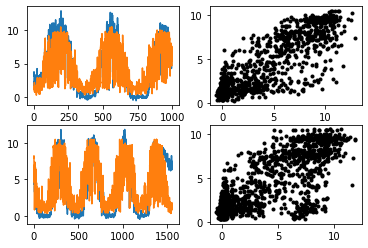

In [ ]:
X = Ho[["TA_F", "SW_IN_F", "VPD_F"]]
y = Ho["GPP_NT_VUT_REF"]


X.loc[:,"VPD_F"] = X.loc[:,"VPD_F"] * 1000
X.loc[:,"SW_IN_F"] = X.loc[:,"SW_IN_F"] / 1000
train_len = 1000
Xtrain = X[0:train_len]
Xtest = X[train_len:-1]

ytrain = y[0:train_len]
ytest = y[train_len:-1]


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(Xtrain, ytrain)
ypred_train = knn.predict(Xtrain)
ypred_test = knn.predict(Xtest)

fig,ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(0,train_len), ytrain)
ax[0,0].plot(np.arange(0,train_len), ypred_train)

ax[0,1].plot(ytrain,ypred_train, 'k.')

ax[1,0].plot(np.arange(0,len(ytest)), ytest)
ax[1,0].plot(np.arange(0,len(ytest)), ypred_test)

ax[1,1].plot(ytest,ypred_test, 'k.')

rmse = np.sqrt(np.mean((ytest-ypred_test)**2))
print(rmse)

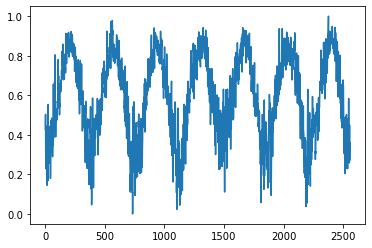

In [ ]:
# data normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = Ho[["TA_F", "SW_IN_F", "VPD_F"]]
y = Ho["GPP_NT_VUT_REF"]

Xnew = min_max_scaler.fit_transform(X)
plt.plot(Xnew[:,0])

1.9672022844212071


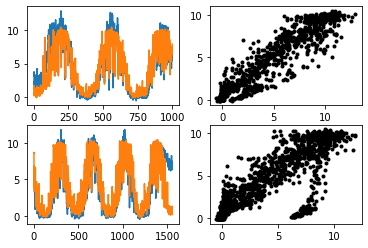

In [ ]:
train_len = 1000
Xtrain = Xnew[0:train_len]
Xtest = Xnew[train_len:-1]

ytrain = y[0:train_len]
ytest = y[train_len:-1]


from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(Xtrain, ytrain)
ypred_train = knn.predict(Xtrain)
ypred_test = knn.predict(Xtest)

fig,ax = plt.subplots(2,2)
ax[0,0].plot(np.arange(0,train_len), ytrain)
ax[0,0].plot(np.arange(0,train_len), ypred_train)

ax[0,1].plot(ytrain,ypred_train, 'k.')

ax[1,0].plot(np.arange(0,len(ytest)), ytest)
ax[1,0].plot(np.arange(0,len(ytest)), ypred_test)

ax[1,1].plot(ytest,ypred_test, 'k.')

rmse = np.sqrt(np.mean((ytest-ypred_test)**2))
print(rmse)


### Pros of kNN

1. **Simplicity and Ease of Implementation:** kNN is straightforward to understand and implement, making it accessible for beginners in machine learning. The algorithm's logic is easy to explain to non-technical stakeholders.

2. **Versatility:** kNN can be used for both classification and regression tasks, and it can handle multi-class problems as well.

3. **No Assumption about Data Distribution:** Unlike many machine learning algorithms, kNN does not make any assumptions about the underlying data distribution, which makes it useful in cases where the data does not follow a known distribution.

4. **Adaptability:** kNN is an instance-based learning method, meaning it adapts immediately as we collect new training data. This makes it suitable for applications where the data is frequently updated.

5. **Effective with Small Datasets:** For small datasets, kNN can be very effective and shows good performance, especially when the number of dimensions (features) is not too high.

### Cons of kNN

1. **Computationally Expensive:** As the dataset grows, kNN becomes significantly slower since the distance needs to be calculated between the query instance and each instance in the training set. This can be particularly challenging with large datasets.

2. **High Memory Requirement:** kNN requires storing the entire dataset for the prediction phase, making it memory-intensive, especially as data volume increases.

3. **Sensitivity to Irrelevant Features:** kNN performance can degrade with the inclusion of irrelevant or redundant features because all features contribute equally to the distance calculations. Feature selection becomes crucial.

4. **Sensitivity to the Scale of Data:** Since kNN uses distance metrics to identify the nearest neighbors, it is sensitive to the scale of the data. Features on larger scales can dominate the distance calculation, necessitating feature scaling for effective performance.

5. **Curse of Dimensionality:** kNN performance can significantly decrease as the number of features (dimensions) increases, due to the curse of dimensionality. In high-dimensional space, distances between pairs of points become less meaningful, and the computational cost increases.

6. **Choosing the Right \(k\):** The choice of \(k\) (the number of nearest neighbors) significantly affects the algorithm's performance. A small \(k\) makes the algorithm sensitive to noise, while a large \(k\) can smooth over distinctions between classes. There's no surefire way to choose \(k\), often requiring experimentation or cross-validation.

7. **Handling Ties and Weighted Contributions:** Deciding how to handle ties and whether to weight the contributions of neighbors by their distance can introduce additional complexity.